# DEEP LEARNING
## Assignment 2 - Time series forecasting
In this assigment we are given a 1000 points univariate time series
where our objective is to predict the values of the following 200 points.

In [19]:
import numpy as np
from scipy.io import loadmat
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
time_series: np.ndarray = loadmat('data/Xtrain.mat')['Xtrain']
#time_series: np.ndarray = np.loadtxt('data/Xtrain.csv', delimiter=',')
#time_series = np.reshape(time_series, newshape=(time_series.shape[0], 1))
data_points = time_series.shape[0]

Plotting of the time series

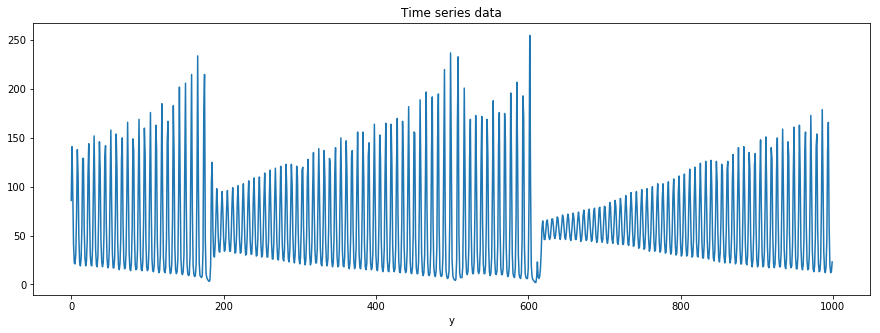

In [10]:
plt.figure(1, figsize=[15, 5])
plt.plot(time_series)
plt.xlabel('x')
plt.xlabel('y')
plt.title('Time series data')
plt.show()

In order to work with the dataset, we are going to normalize it,
scaling it between [-1,1]. The _MinMaxScaler_ object will be used
later to denormalize also.

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
time_series = min_max_scaler.fit_transform(time_series)

Once normalized, we are going to analyze the time series, to see
if we can extract valuable information about the time series that
help us regarding to the configuration of the network.

First we are going to check the correlation and the autorcorrelation:

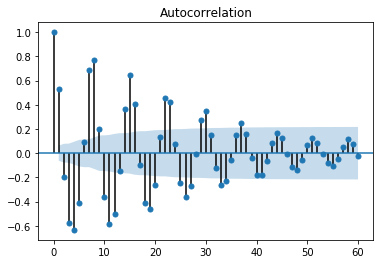

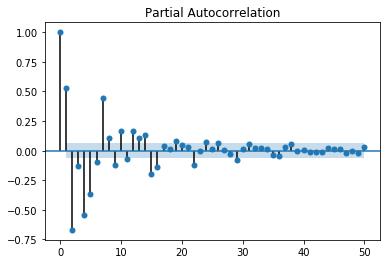

In [25]:
plot_acf(time_series, lags=60)
plt.show()
plot_pacf(time_series, lags=50)
plt.show()

#TODO: Check this

We can observe in both plots, the autocorrelation and partial 
autocorrelation, that there is an influence in the value of a point
and the previous points. This influence lasts for at least 40 points,
when the influence falls under the confidence interval. 

This could give us a hint about the time windows.

